<center>
    <img src="https://weclouddata.s3.amazonaws.com/images/logos/wcd_logo_new_2.png" width='30%'>
</center>

----------

<h1 align="center"> Pandas Intro Exercises </h1>
<h2 align="center"> (Solutions) </h2>
<br>
<br>
<center align="left"> <font size='4'>  Developed by: </font><font size='4' color='#33AAFBD'>WeCloudData</font></center>
<br>

----------

# Data Exploration.

> Dataset can be downloaded from here:
- https://s3.amazonaws.com/weclouddata/datasets/genai/ml_fundamentals/telecom.csv

In [1]:
!wget https://s3.amazonaws.com/weclouddata/datasets/genai/ml_fundamentals/telecom.csv

--2024-01-19 12:17:28--  https://s3.amazonaws.com/weclouddata/datasets/genai/ml_fundamentals/telecom.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 16.182.37.216, 52.217.106.14, 52.217.131.0, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|16.182.37.216|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/csv]
Saving to: ‘telecom.csv’

telecom.csv         100%[===================>] 954.59K  --.-KB/s    in 0.1s    

2024-01-19 12:17:28 (6.75 MB/s) - ‘telecom.csv’ saved [977501/977501]



> ### Read in the telecom churn dataset.
>    - Check for the size of the dataset.
>    - Check for null values.

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("telecom.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.isnull().sum() # no null values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

> ### 1. Check for how many numerical and categorical there are in the dataset.
>    - Use the select_dtypes() method. [select_dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html)

In [ ]:
data.select_dtypes

<bound method DataFrame.select_dtypes of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service        

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Can set the include parameter to show columns with the specified data types
# Note: In this dataset, some of the categorical attributes were just set as object dtype
data.select_dtypes #(include=['category', 'float64', 'int64'])

> ### 2. Map the following columns `Partner`, `Dependents`, `PhoneService`
>    - For each of the columns listed above, map `Yes` to `1`, `No` to `0`.


In [ ]:
columns = ['Partner','Dependents','PhoneService']

In [ ]:
# METHOD 1: Using replace()
data[columns] = data[columns].replace(['Yes', 'No'], [1, 0])
data[columns]

,Partner,Dependents,PhoneService
0,1,0,0
1,0,0,1
2,0,0,1
3,0,0,0
4,0,0,1
...,...,...,...
7038,1,1,1
7039,1,1,1
7040,1,1,0
7041,1,0,1


In [ ]:
# # METHOD 2: Using applymap()
data[columns] = data[columns].applymap(lambda x: 1 if x == "Yes" else 0)
data[columns]

,Partner,Dependents,PhoneService
0,1,0,0
1,0,0,1
2,0,0,1
3,0,0,0
4,0,0,1
...,...,...,...
7038,1,1,1
7039,1,1,1
7040,1,1,0
7041,1,0,1


> ### 3. Convert the data type of the `TotalCharges` column to the float data type.
>    - Replace missing values with 0

In [ ]:
# METHOD 1: Using replace()
# Filling in empty spaces (technically not NaN values)
data['TotalCharges'] = data['TotalCharges'].replace(' ',0).fillna(0)

In [ ]:
data['TotalCharges'] = data['TotalCharges'].astype(np.float64)

In [ ]:
data['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [ ]:
# Checking to see if there's still null values
data['TotalCharges'].isnull().sum()

0

In [ ]:
# METHOD 2: Using to_numeric()
    # 'coerce' will convert bad non-numeric values to NaN
    # Then fill in missing values
    # Note: Would need to rerun all cells above except for q3.method_1
pd.to_numeric(data['TotalCharges'], errors='coerce').fillna(0)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [ ]:
# Checking to see if there's still null values
pd.to_numeric(data['TotalCharges'], errors='coerce').fillna(0).isnull().sum()

0

> ### 4. Return the top 10 customers with the highest `TotalCharges`.
>    - a) How many of these customers have multiple lines?
>    - b) How many of these customers have subscribed to `PaperlessBilling`?

In [ ]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# Top 10 customers for highest TotalCharges
top_10 = data.sort_values(by='TotalCharges', ascending=False)[
    ['customerID', 'gender', 'TotalCharges', 'MultipleLines', 'PaperlessBilling']].head(10)
top_10

,customerID,gender,TotalCharges,MultipleLines,PaperlessBilling
2845,9093-FPDLG,Female,999.9,No,Yes
3353,4536-PLEQY,Male,999.8,No,Yes
3686,5899-MQZZL,Female,999.45,Yes,Yes
5598,6051-PTVNS,Female,998.1,No,No
6646,8249-THVEC,Male,997.75,No,No
6179,6328-ZPBGN,Female,997.65,Yes,Yes
1935,7297-DVYGA,Female,996.95,No,Yes
348,6243-OZGFH,Female,996.85,No phone service,Yes
2715,0484-JPBRU,Male,996.45,Yes,Yes
5842,2971-SGAFL,Female,995.35,Yes,Yes


In [ ]:
# How many of these customers have multiple lines?
multi_line = top_10[top_10['MultipleLines']=='Yes']
print(multi_line)

print(f'\nCustomers with multiple lines: {len(multi_line)}')

      customerID  gender TotalCharges MultipleLines PaperlessBilling
3686  5899-MQZZL  Female       999.45           Yes              Yes
6179  6328-ZPBGN  Female       997.65           Yes              Yes
2715  0484-JPBRU    Male       996.45           Yes              Yes
5842  2971-SGAFL  Female       995.35           Yes              Yes

Customers with multiple lines: 4


> ### 5. Return the top 100 customers with the highest `MonthlyCharges`
>    - a) What was the most frequent `InternetService` used by these customers?
>    - b) How many of these customers churned? (Return the results as a percentage)
>        - **hint:** `normalize` parameter in value_counts() method.

In [ ]:
# a) What was the most frequent InternetService used by these customers?

In [ ]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# Top 100 customers for highest MonthlyCharges
top_100 = data.sort_values(by='MonthlyCharges', ascending=False)[
    ['customerID', 'gender', 'MonthlyCharges', 'InternetService', 'Churn']].head(100)
top_100

,customerID,gender,MonthlyCharges,InternetService,Churn
4586,7569-NMZYQ,Female,118.75,Fiber optic,No
2115,8984-HPEMB,Female,118.65,Fiber optic,No
3894,5989-AXPUC,Female,118.60,Fiber optic,No
4804,5734-EJKXG,Female,118.60,Fiber optic,No
5127,8199-ZLLSA,Male,118.35,Fiber optic,Yes
...,...,...,...,...,...
2967,7663-CUXZB,Male,113.75,Fiber optic,No
3508,2368-GAKKQ,Female,113.65,Fiber optic,No
3107,5038-ETMLM,Female,113.65,Fiber optic,No
2267,9239-GZHZE,Female,113.65,Fiber optic,No


In [ ]:
# iloc[0] returns first row in df/first item in Series
top_100['InternetService'].mode().iloc[0]

'Fiber optic'

In [ ]:
top_100['InternetService'].mode()[0] # Gets same results as above

'Fiber optic'

In [ ]:
top_100['InternetService'].value_counts().head(1)

# Note: There's only one category for InternetService for the top 100 customers
# Ans: Fiber optic is the most frequently used InternetService for these particular customers

Fiber optic    100
Name: InternetService, dtype: int64

In [ ]:
# b) How many of these customers churned? (Return the results as a percentage)

In [ ]:
# With normalize set to True, returns the relative frequency
# by dividing all values by the sum of values
top_100['Churn'].value_counts(normalize=True) * 100

# Ans: 8% of the top 100 customers churned

No     92.0
Yes     8.0
Name: Churn, dtype: float64

> ### 6. Create a new column named `loyalty`. This column will contain the following:
> Iterate through the `tenure` column and store the following elements in a list. Assign the list to the column `loyalty`:
>    - If the customers tenure is below 12, flag it as `Bronze`.
>    - If the customers tenure is between 12 and 24, flag it as `Silver`.
>    - If the customers tenure is above 24, flag it as `Gold`.


In [ ]:
# METHOD 1: Using list comprehension
def lst_comprehension():
    '''
    Return data df with a new column named 'loyalty' where tenure
    is categorized using list comprension.
    '''
    data['loyalty'] = ['Bronze' if tenure < 12
                       else 'Silver' if (12<= tenure <=24)
                       else 'Gold'
                       for tenure in data['tenure']]
    return data

method_1 = lst_comprehension()
method_1[['tenure', 'loyalty']]

,tenure,loyalty
0,1,Bronze
1,34,Gold
2,2,Bronze
3,45,Gold
4,2,Bronze
...,...,...
7038,24,Silver
7039,72,Gold
7040,11,Bronze
7041,4,Bronze


In [ ]:
# METHOD 2: Using np.select()
# np.select() > np.where() as we have more than 2 conditions
def np_select():
    '''
    Return data df with a new column named 'loyalty' where tenure
    is categorized using np.select().

    Note: default value is set to 'Bronze' (data['tenure'] < 12)
    '''
    conditions = [(data['tenure'] >= 12) & (data['tenure'] <= 24), # Silver
                  (data['tenure'] > 24)] # Gold
    levels = ['Silver', 'Gold']

    data['loyalty'] = np.select(conditions, levels, default='Bronze')
    return data

method_2 = np_select()
method_2[['tenure', 'loyalty']]

,tenure,loyalty
0,1,Bronze
1,34,Gold
2,2,Bronze
3,45,Gold
4,2,Bronze
...,...,...
7038,24,Silver
7039,72,Gold
7040,11,Bronze
7041,4,Bronze


> ### 7. Create a new column named `Customer Value`. This column will contain the following:
> Iterate through the `TotalCharges` column and store the following elements in a list. Assign the list to the column `Customer Value`:
>    - If the customers TotalCharges is below 1000, flag the customer as `low`.
>    - If the customers TotalCharges is between 1000 and 3000, flag the customer as `medium`.
>    - If the customers TotalCharges is above 3000, flag the customer as `high`.

In [ ]:
# For list comprehension method, see answer for last question

In [ ]:
## np.select() method
# Need to convert to float first so we can do our comparisons later
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [ ]:
# Now it's float, not object
data['TotalCharges'].dtype

dtype('float64')

In [ ]:
conditions = [(data['TotalCharges'] >= 1000) & (data['TotalCharges'] <= 3000), # medium
                  (data['TotalCharges'] > 3000)] # high
levels = ['medium', 'high']

data['CustomerValue'] = np.select(conditions, levels, default='low')
data[['TotalCharges', 'CustomerValue']]

,TotalCharges,CustomerValue
0,29.85,low
1,1889.50,medium
2,108.15,low
3,1840.75,medium
4,151.65,low
...,...,...
7038,1990.50,medium
7039,7362.90,high
7040,346.45,low
7041,306.60,low


> ### 8. Which payment method is the most frequent?
>    - a) Use the to_dict() method to convert the output to a dictionary.
>    - b) Create a new dataframe `top_payment_method` using the dictionary generated from the previous step. Name the column `frequency`.

In [ ]:
dict_paym_method = data['PaymentMethod'].value_counts().to_dict()
dict_paym_method

{'Electronic check': 2365,
 'Mailed check': 1612,
 'Bank transfer (automatic)': 1544,
 'Credit card (automatic)': 1522}

In [ ]:
top_payment_method = pd.DataFrame.from_dict(dict_paym_method,
                                           orient='index',
                                           columns=['Frequency'])
top_payment_method

,Frequency
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522


In [ ]:
# Ans: Electronic check is the most frequent method of payment

> ### 9. How many customers are on a One year contract and have not completed a 12 month tenure?

In [ ]:
col_interest = ['customerID', 'tenure', 'Contract']

In [ ]:
def pandas_filter():
    '''
    Return a df of customers who are on a one year contract and
    have not completed a 12 month tenure, filtering by column value
    '''
    return data[(data['tenure'] < 12) & \
                (data['Contract'] == 'One year')][col_interest]

method_1 = pandas_filter()
method_1.head()

,customerID,tenure,Contract
40,8865-TNMNX,10,One year
146,6837-BJYDQ,3,One year
164,2907-ILJBN,11,One year
222,6469-MRVET,1,One year
323,7102-JJVTX,9,One year


In [ ]:
def np_where():
    '''
    Return a df of customers who are on a one year contract and
    have not completed a 12 month tenure, filtering by NumPy where()
    '''
    return data[col_interest]. \
           iloc[np.where((data['tenure'] < 12) &
                         (data['Contract'] == 'One year'))]

method_2 = np_where()
method_2.head()

,customerID,tenure,Contract
40,8865-TNMNX,10,One year
146,6837-BJYDQ,3,One year
164,2907-ILJBN,11,One year
222,6469-MRVET,1,One year
323,7102-JJVTX,9,One year


In [ ]:
# len(method_1)
len(method_2)

102

In [ ]:
# Ans: 102 customers are on 1y contract & haven't completed a 12m tenure

> ### 10. How many customers are on a One Year contract, are subscribed to tech support and are in the `Gold` loyalty program?

In [ ]:
col_interest = ['customerID', 'Contract', 'TechSupport', 'loyalty']

In [ ]:
conditions = ((data['Contract'] == 'One year') &
              (data['TechSupport'] == 'Yes') &
              (data['loyalty'] == 'Gold'))

In [ ]:
# METHOD 1: Filtering by column value
method_1 = data[conditions][col_interest]
method_1.head()

,customerID,Contract,TechSupport,loyalty
3,7795-CFOCW,One year,Yes,Gold
32,6827-IEAUQ,One year,Yes,Gold
54,4667-QONEA,One year,Yes,Gold
57,5067-XJQFU,One year,Yes,Gold
96,9803-FTJCG,One year,Yes,Gold


In [ ]:
# METHOD 2: using np.where()
method_2 = data[col_interest].iloc[np.where(conditions)]
method_2.head()

,customerID,Contract,TechSupport,loyalty
3,7795-CFOCW,One year,Yes,Gold
32,6827-IEAUQ,One year,Yes,Gold
54,4667-QONEA,One year,Yes,Gold
57,5067-XJQFU,One year,Yes,Gold
96,9803-FTJCG,One year,Yes,Gold


In [ ]:
# len(method_1)
len(method_2)

476

In [ ]:
# Ans: 476 customers are are on a one year contract,
# are subscribed to tech support, and are in the Gold loyalty program

> ### 11. How many customers from the dataset churned? How many did not churn? (Display as a percentage)

In [ ]:
# With normalize set to True, returns the relative frequency
# by dividing all values by the sum of values
data['Churn'].value_counts(normalize=True).round(3) * 100

# Ans: 26.5% of the customers from the overall dataset churned

No     73.5
Yes    26.5
Name: Churn, dtype: float64

## Exploring customers who churned.
>    - Create a dataframe for customers who churned and name the dataframe `churned`

In [ ]:
churned = data[data['Churn'] == 'Yes']
churned.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,loyalty,CustomerValue
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Bronze,low
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Bronze,low
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,Bronze,low
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,Gold,high
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,Gold,high


> ### 12. For customers who churned:
>    - a) What is the gender distribution?
>    - b) What is the average tenure length per `Contract`?
>    - c) For Males & Females, what is the average tenure length per `Contract` for each gender group?
>    - d) For Males & Females, what is the average tenure length per `Contract` for each gender group for customers who are on `DSL`?

In [ ]:
# a) What is the gender distribution?
churned['gender'].value_counts(normalize=True).round(3) * 100

Female    50.2
Male      49.8
Name: gender, dtype: float64

In [ ]:
churned_counts_gender = churned['gender'].value_counts()
churned_counts_gender

Female    939
Male      930
Name: gender, dtype: int64

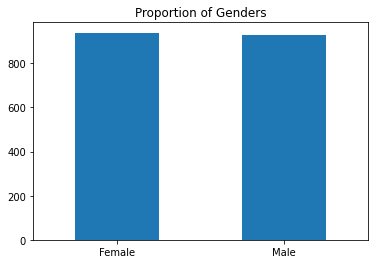

In [ ]:
churned_counts_gender.plot(kind='bar',
                           title='Proportion of Genders',
                           x='gender',
                           y='Frequency',
                           rot=0);

In [ ]:
# Ans: There's 939 females (50.2%) and 930 males (49.8%) who churned

In [ ]:
# b) What is the average tenure length per Contract?
churned.pivot_table('tenure', index='Contract', aggfunc='mean').\
        rename(columns={'tenure':'avg_tenure'}).round(2)

,avg_tenure
Contract,
Month-to-month,14.02
One year,44.96
Two year,61.27


In [ ]:
# c) For Males & Females, what is the average tenure length
# per Contract for each gender group?
churned.pivot_table('tenure', columns='gender', index='Contract',
                    aggfunc='mean').round(2)

gender,Female,Male
Contract,,
Month-to-month,13.50,14.55
One year,44.60,45.26
Two year,56.91,64.96


In [ ]:
# d) For Males & Females, what is the average tenure length
# per Contract for each gender group for customers who are on DSL?
churned_DSL = churned[churned['InternetService'] == 'DSL']
churned_DSL.pivot_table('tenure', columns='gender', index='Contract',
                        aggfunc='mean').round(2)

gender,Female,Male
Contract,,
Month-to-month,10.24,9.08
One year,36.00,35.68
Two year,64.86,64.80


> ### 13. Senior Citizens that churned:
>    - a) Which `InternetService` brought in the most sales?
>    - b) What is the distribution of seniors from each loyalty program?
>    - c) Which `PaymentMethod` is bringing in the most sales from each loyalty program?
>    - d) How many Seniors are in the `Gold` loyalty program or are a `low` valued customer?
>    - e) Are there any Seniors that are in both the `Gold` loyalty program but considered a low valued customer?

In [ ]:
churned_seniors = churned[churned['SeniorCitizen'] == 1]
churned_seniors.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,loyalty,CustomerValue
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,Bronze,low
53,7495-OOKFY,Female,1,Yes,No,8,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Credit card (automatic),80.65,633.30,Yes,Bronze,low
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes,Silver,medium
99,4598-XLKNJ,Female,1,Yes,No,25,Yes,No,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,98.50,2514.50,Yes,Gold,medium
113,4846-WHAFZ,Female,1,Yes,No,37,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,76.50,2868.15,Yes,Gold,medium


In [ ]:
# a) Which InternetService brought in the most sales?
churned_seniors.pivot_table('TotalCharges', index='InternetService',
                            aggfunc='sum')

,TotalCharges
InternetService,
DSL,79977.40
Fiber optic,801988.35
No,439.40


In [ ]:
# Ans: Fiber optic brought in the most sales

In [ ]:
# b) What is the distribution of seniors from each loyalty program?
churned_seniors.value_counts(['loyalty', 'gender'])

loyalty  gender
Bronze   Female    115
         Male       95
Gold     Male       90
         Female     86
Silver   Male       51
         Female     39
dtype: int64

In [ ]:
# Ans to b) as a pivot table
churned_seniors.pivot_table(values='customerID',
                            columns='gender',
                            index='loyalty',
                            aggfunc='count')

gender,Female,Male
loyalty,,
Bronze,115,95
Gold,86,90
Silver,39,51


In [ ]:
# c) Which PaymentMethod is bringing in the most sales from each
# loyalty program?
paym_sales = churned_seniors.pivot_table('TotalCharges',
                                         columns='loyalty',
                                         index='PaymentMethod',
                                         aggfunc='sum')
paym_sales

loyalty,Bronze,Gold,Silver
PaymentMethod,,,
Bank transfer (automatic),5791.70,123489.3,16152.55
Credit card (automatic),8728.85,146473.9,16805.00
Electronic check,42027.70,395287.3,88310.90
Mailed check,5960.25,27041.1,6336.60


In [ ]:
# Goes through each column of our pivot table (which are the loyalty
# categories) and gets the biggest value
paym_sales.idxmax()

loyalty
Bronze    Electronic check
Gold      Electronic check
Silver    Electronic check
dtype: object

In [ ]:
# Ans: Electronic check brings in the most sales for each loyalty program

In [ ]:
# d) How many Seniors are in the Gold loyalty program or are a
# low valued customer?
low_or_gold_seniors = churned_seniors[(churned_seniors['loyalty'] == 'Gold') |
                  (churned_seniors['CustomerValue'] == 'low')]
low_or_gold_seniors[['customerID', 'loyalty', 'CustomerValue']]

,customerID,loyalty,CustomerValue
20,8779-QRDMV,Bronze,low
53,7495-OOKFY,Bronze,low
99,4598-XLKNJ,Gold,medium
113,4846-WHAFZ,Gold,medium
126,4412-YLTKF,Gold,medium
...,...,...,...
6993,6583-QGCSI,Gold,high
7008,1980-KXVPM,Bronze,low
7010,0723-DRCLG,Bronze,low
7032,6894-LFHLY,Bronze,low


In [ ]:
len(low_or_gold_seniors)
# Ans: There's 394 Seniors who are in the Gold loyalty program
# OR they are a low valued customer

394

In [ ]:
# e) Are there any Seniors that are in both the Gold loyalty program
# but considered a low valued customer?
low_and_gold_seniors = churned_seniors[(churned_seniors['loyalty'] == 'Gold') &
                      (churned_seniors['CustomerValue'] == 'low')]
low_and_gold_seniors[['customerID', 'loyalty', 'CustomerValue']]

,customerID,loyalty,CustomerValue
358,9057-MSWCO,Gold,low


In [ ]:
len(low_and_gold_seniors)
# Ans: There's 1 Senior who's in the Gold loyalty program
# AND is a low valued customer

1